# Assignment 3
Author: Anna Lozenko

Create a pie chart of peoples email domains from this [URL](https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download). Data from the URL has been downloaded as "people-1000.csv".

In [1]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the data
file = "people-1000.csv"
data = pd.read_csv(file)
print(data.head(5))

   Index          User Id First Name Last Name     Sex  \
0      1  8717bbf45cCDbEe     Shelia   Mahoney    Male   
1      2  3d5AD30A4cD38ed         Jo    Rivers  Female   
2      3  810Ce0F276Badec     Sheryl    Lowery  Female   
3      4  BF2a889C00f0cE1    Whitney    Hooper    Male   
4      5  9afFEafAe1CBBB9    Lindsey      Rice  Female   

                           Email               Phone Date of birth  \
0            pwarner@example.org        857.139.8239    2014-01-27   
1  fergusonkatherine@example.net     +1-950-759-8687    1931-07-26   
2            fhoward@example.org       (599)782-0605    2013-11-25   
3          zjohnston@example.com     +1-939-130-6258    2012-11-17   
4               elin@example.net  (390)417-1635x3010    1923-04-15   

                  Job Title  
0         Probation officer  
1                    Dancer  
2                      Copy  
3  Counselling psychologist  
4       Biomedical engineer  


In [3]:
#check the email column
print(data["Email"].head(4))

0              pwarner@example.org
1    fergusonkatherine@example.net
2              fhoward@example.org
3            zjohnston@example.com
Name: Email, dtype: object


In [4]:
# add a new column for email domains
data["Domains"] = data["Email"].str.split("@").str[1]
print(data["Domains"].head())

0    example.org
1    example.net
2    example.org
3    example.com
4    example.net
Name: Domains, dtype: object


In [5]:
#check unique domains
print(data["Domains"].unique())

['example.org' 'example.net' 'example.com']


In [6]:
#count occurrences of each domain
domain_counts= data["Domains"].value_counts()
print(domain_counts)

Domains
example.org    341
example.com    339
example.net    320
Name: count, dtype: int64


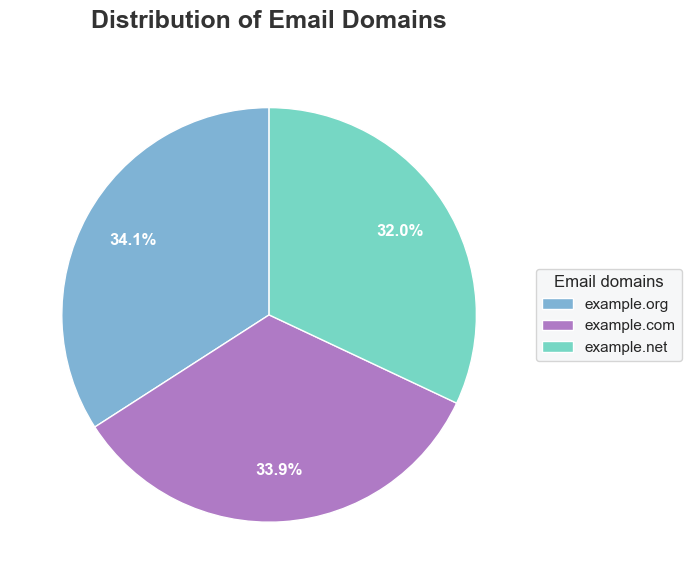

In [7]:
# Create a pie chart of the email domains

sns.set_theme(style="whitegrid") # set a clean seaborn theme

colors = ["#7fb3d5", "#af7ac5", "#76d7c4"]   # refined skyblue, purple, aquamarine
labels = ["example.org", "example.com", "example.net"]

fig, ax = plt.subplots(figsize=(10, 6))

# Create the pie chart
wedges, texts, autotexts = ax.pie(
    domain_counts,
    colors=colors,
    shadow=False,
    startangle=90,         # makes the first wedge start at top
    autopct="%1.1f%%",
    pctdistance=0.75,      # keeps labels well inside
    textprops={"fontsize": 12, "color": "#333"}
)

# style percentage labels
for t in autotexts:
    t.set_color("white")
    t.set_fontweight("bold")
    t.set_fontsize(12)

# Set title
ax.set_title(
   "Distribution of Email Domains",
    fontsize=18,
    fontweight="bold",
    color="#333",
    pad=20
)

# Add legend
legend = plt.legend(
    title="Email domains",
    labels=labels,
    loc='center left',
    bbox_to_anchor=(1.0, 0.5),
    frameon=True
)

legend.get_frame().set_facecolor("#f4f6f7") # light gray-blue background for legend

plt.tight_layout()
plt.show()
